In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import torch 
from sklearn.datasets import load_diabetes
from PFNExperiments.Evaluation.RealWorldEvaluation.PreprocessDataset import Preprocessor

In [12]:
from PFNExperiments.Evaluation.RealWorldEvaluation.EvaluateRealWorld import EvaluateRealWorld

from PFNExperiments.LinearRegression.GenerativeModels.LM_abstract import return_only_y, print_code

from PFNExperiments.LinearRegression.ComparisonModels.Variational_InferenceAutoguide import Variational_InferenceAutoguide
from PFNExperiments.LinearRegression.ComparisonModels.Hamiltionion_MC import Hamiltionian_MC

from PFNExperiments.LinearRegression.ComparisonModels.AnalyticalSolutionsLM import PosteriorLM_IG
from pyro.infer.autoguide import AutoDiagonalNormal, AutoMultivariateNormal, AutoLaplaceApproximation, AutoIAFNormal, AutoStructured

In [14]:
from PFNExperiments.Evaluation.RealWorldEvaluation.PreprocessDataset import Preprocessor
from PFNExperiments.Evaluation.RealWorldEvaluation.GetDataOpenML import GetDataOpenML
getdata = GetDataOpenML(
    preprocessor = Preprocessor(
        N_datapoints = 100,
        P_features = 10,
        target_mean = 0.0,
        target_var = 1.0
    ),
    save_path = "C:/Users/arik_/Documents/Dokumente/Job_Clausthal/PFNs/Repository/PFNExperiments/Evaluation/RealWorldEvaluation/DatasetsOpenML/Tabular_benchmark_numerical_regression.pkl",
    benchmark_id = 336
)
datasets = getdata.get_data()

An error occured while preprocessing the dataset with id 361078. Skipping the dataset
An error occured while preprocessing the dataset with id 361080. Skipping the dataset
An error occured while preprocessing the dataset with id 361081. Skipping the dataset
An error occured while preprocessing the dataset with id 361082. Skipping the dataset
An error occured while preprocessing the dataset with id 361083. Skipping the dataset
An error occured while preprocessing the dataset with id 361085. Skipping the dataset
An error occured while preprocessing the dataset with id 361086. Skipping the dataset
An error occured while preprocessing the dataset with id 361280. Skipping the dataset
An error occured while preprocessing the dataset with id 361281. Skipping the dataset


In [15]:
from PFNExperiments.LinearRegression.GenerativeModels.GenerateDataLM_Examples import make_lm_program_ig, make_lm_program_ig_batched

make_lm_program = make_lm_program_ig
make_lm_program_batched = make_lm_program_ig_batched

In [16]:
a = 5.0
b = 2.0
tau = 1.0

N_SAMPLES_PER_MODEL = 100

pprogram1 = make_lm_program_ig(tau = tau, a = a, b = b)

pprogram1_y = return_only_y(pprogram1)

analytical_solution = PosteriorLM_IG(
    pprogram_dict= {
        "tau": tau,
        "a": a,
        "b": b
    },
    n_samples=N_SAMPLES_PER_MODEL
)

vi_diag = Variational_InferenceAutoguide(
    pprogram=pprogram1_y,
    make_guide_fun = AutoDiagonalNormal,
    n_steps = 2000,
    n_samples=N_SAMPLES_PER_MODEL,
    lr = 1e-2
)

vi_multivariate_normal = Variational_InferenceAutoguide(
    pprogram=pprogram1_y,
    make_guide_fun = AutoMultivariateNormal,
    n_steps = 2000,
    n_samples=N_SAMPLES_PER_MODEL,
    lr = 1e-2
)


hmc_sampler = Hamiltionian_MC(pprogram = pprogram1_y, n_warmup=500, n_samples=N_SAMPLES_PER_MODEL)

In [ ]:
eval = EvaluateRealWorld(
    posterior_model = analytical_solution,
    evaluation_datasets = datasets,
    comparison_models = [vi_diag, 
                         vi_multivariate_normal, 
                         #hmc_sampler
                         ],
    n_evaluation_cases = 2
)

In [ ]:
eval.run_evaluation()

Sampling posterior:   0%|          | 0/10 [00:00<?, ?it/s]

....................

Sampling posterior:  10%|█         | 1/10 [00:15<02:15, 15.02s/it]


....................

Sampling posterior:  20%|██        | 2/10 [00:27<01:48, 13.61s/it]


....................

Sampling posterior:  30%|███       | 3/10 [00:53<02:13, 19.01s/it]


....................

Sampling posterior:  40%|████      | 4/10 [01:09<01:47, 17.90s/it]


....................

Sampling posterior:  50%|█████     | 5/10 [01:26<01:28, 17.60s/it]


....................

Sampling posterior:  60%|██████    | 6/10 [01:41<01:06, 16.70s/it]


....................

Sampling posterior:  70%|███████   | 7/10 [01:54<00:46, 15.62s/it]


....................

Sampling posterior:  80%|████████  | 8/10 [02:08<00:29, 14.97s/it]


....................

Sampling posterior:  90%|█████████ | 9/10 [02:22<00:14, 14.61s/it]


....................

Sampling posterior: 100%|██████████| 10/10 [02:37<00:00, 15.75s/it]


Sampling posterior:   0%|          | 0/10 [00:00<?, ?it/s]

....................

Sampling posterior:  10%|█         | 1/10 [00:16<02:25, 16.20s/it]


....................

Sampling posterior:  20%|██        | 2/10 [00:31<02:05, 15.69s/it]


....................

Sampling posterior:  30%|███       | 3/10 [00:47<01:49, 15.67s/it]


....................

Sampling posterior:  40%|████      | 4/10 [01:02<01:33, 15.53s/it]


....................

Sampling posterior:  50%|█████     | 5/10 [01:18<01:18, 15.66s/it]


....................

Sampling posterior:  60%|██████    | 6/10 [01:33<01:02, 15.53s/it]


....................

Sampling posterior:  70%|███████   | 7/10 [01:49<00:47, 15.71s/it]


....................

Sampling posterior:  80%|████████  | 8/10 [02:04<00:31, 15.56s/it]


....................

Sampling posterior:  90%|█████████ | 9/10 [02:20<00:15, 15.54s/it]


....................

Sampling posterior: 100%|██████████| 10/10 [02:35<00:00, 15.54s/it]

Comparison to ground truth:

Summarized results:

Comparison among models:

Summarized results:


,Model 1,Model 2,Mean_Wasserstein_distance with metric euclidean,Mean_MMD,Mean_cst_roc_auc,Std_Wasserstein_distance with metric euclidean,Std_MMD,Std_cst_roc_auc
0,<PFNExperiments.LinearRegression.ComparisonMod...,Variational Inference with guide: AutoDiagonal...,2.104744,0.523520,0.7865,0.233680,0.599741,0.192845
1,<PFNExperiments.LinearRegression.ComparisonMod...,Variational Inference with guide: AutoMultivar...,2.126666,0.138123,0.6135,0.272815,0.096878,0.096207
2,Variational Inference with guide: AutoDiagonal...,Variational Inference with guide: AutoMultivar...,2.064998,0.437553,0.7860,0.284825,0.547165,0.173842


P-values:


,Pair 1: Model A,Pair 1: Model B,Pair 2: Model A,Pair 2: Model B,Wasserstein_distance with metric euclidean_p-value,MMD_p-value,cst_roc_auc_p-value
0,<PFNExperiments.LinearRegression.ComparisonMod...,Variational Inference with guide: AutoDiagonal...,<PFNExperiments.LinearRegression.ComparisonMod...,Variational Inference with guide: AutoMultivar...,0.850107,0.121225,0.058592
1,<PFNExperiments.LinearRegression.ComparisonMod...,Variational Inference with guide: AutoDiagonal...,Variational Inference with guide: AutoDiagonal...,Variational Inference with guide: AutoMultivar...,0.733730,0.623176,0.791107
2,<PFNExperiments.LinearRegression.ComparisonMod...,Variational Inference with guide: AutoMultivar...,Variational Inference with guide: AutoDiagonal...,Variational Inference with guide: AutoMultivar...,0.623176,0.161972,0.031082


{'summarized_results': {'model_comparison_among_each_other':                                              Model 1  \
  0  <PFNExperiments.LinearRegression.ComparisonMod...   
  1  <PFNExperiments.LinearRegression.ComparisonMod...   
  2  Variational Inference with guide: AutoDiagonal...   
  
                                               Model 2  \
  0  Variational Inference with guide: AutoDiagonal...   
  1  Variational Inference with guide: AutoMultivar...   
  2  Variational Inference with guide: AutoMultivar...   
  
     Mean_Wasserstein_distance with metric euclidean  Mean_MMD  \
  0                                         2.104744  0.523520   
  1                                         2.126666  0.138123   
  2                                         2.064998  0.437553   
  
     Mean_cst_roc_auc  Std_Wasserstein_distance with metric euclidean   Std_MMD  \
  0            0.7865                                        0.233680  0.599741   
  1            0.6135                 

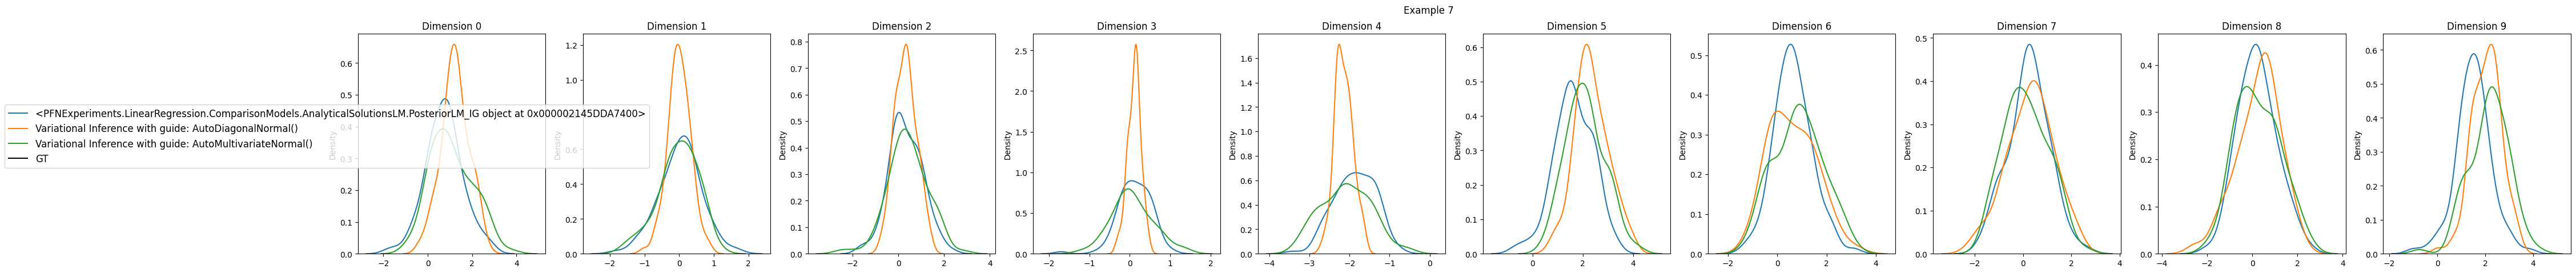

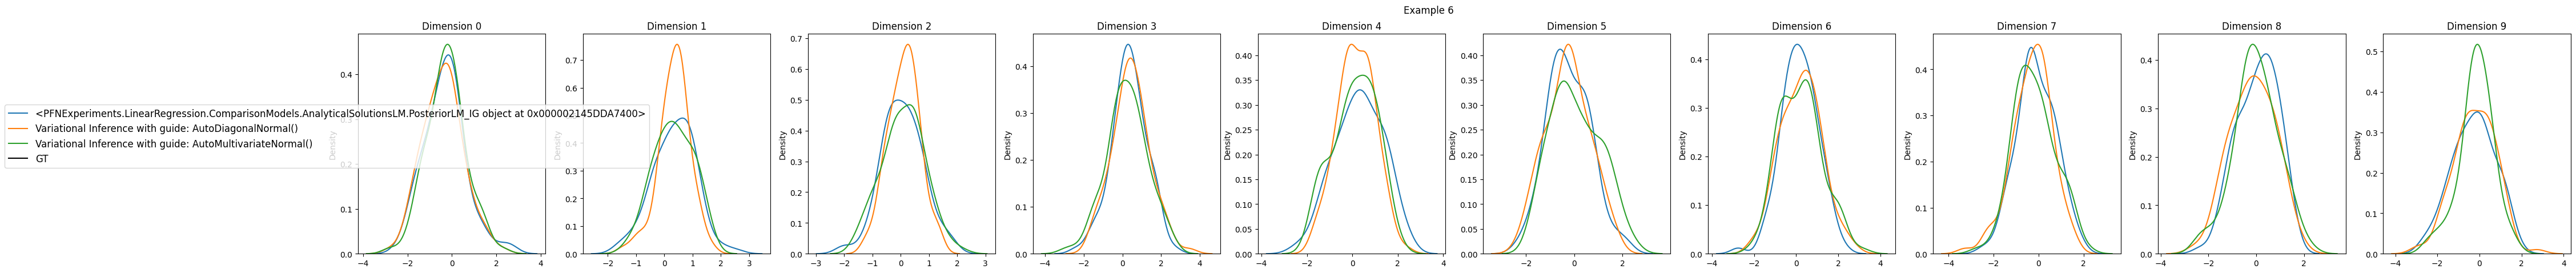

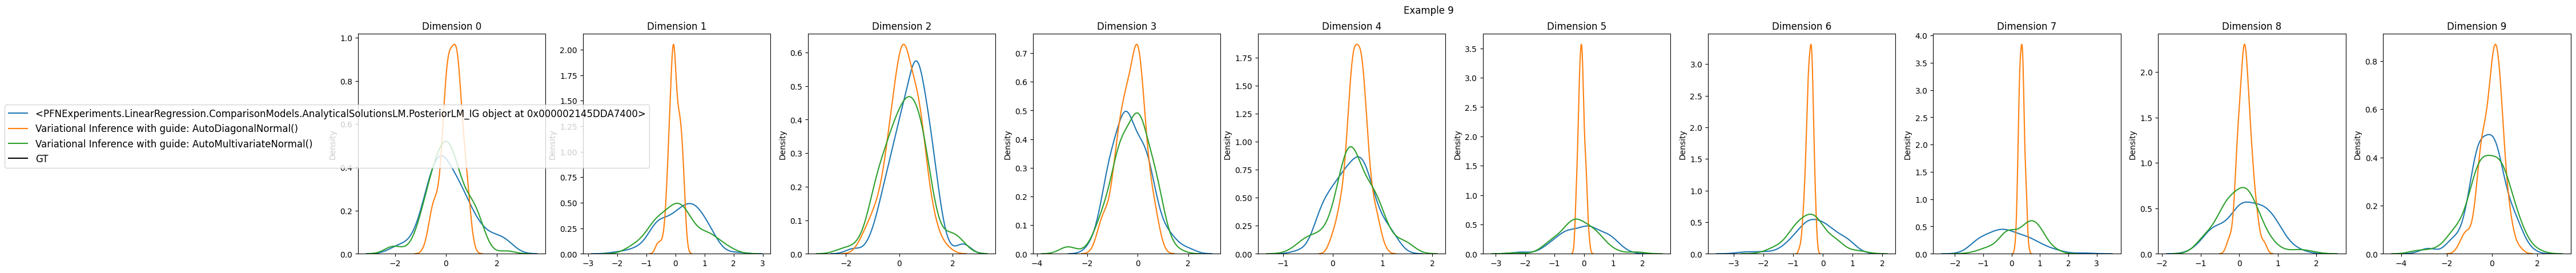

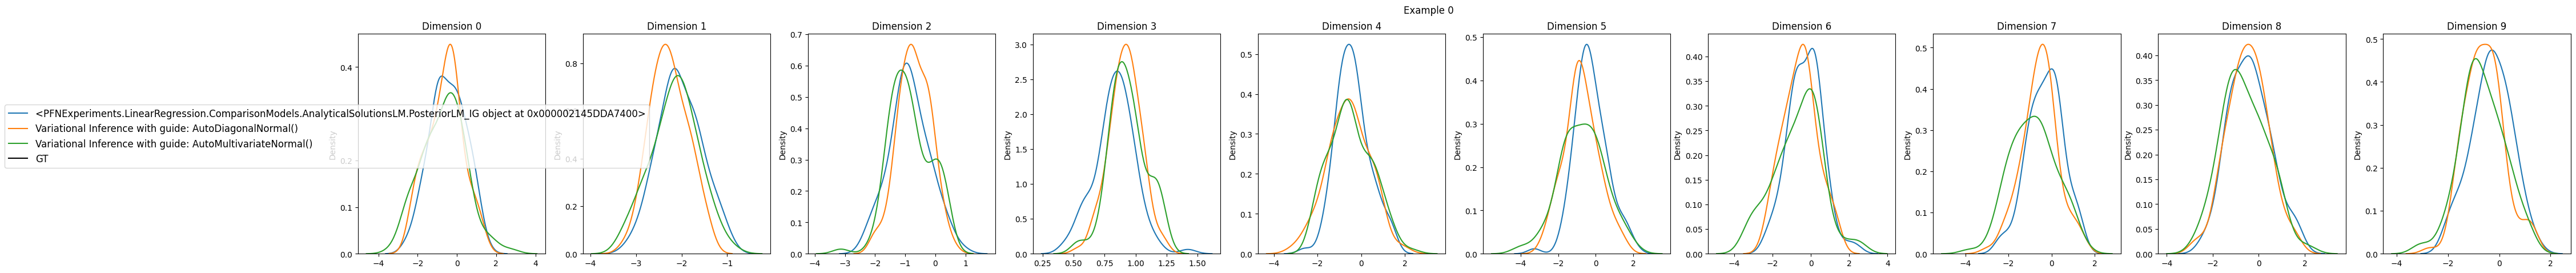

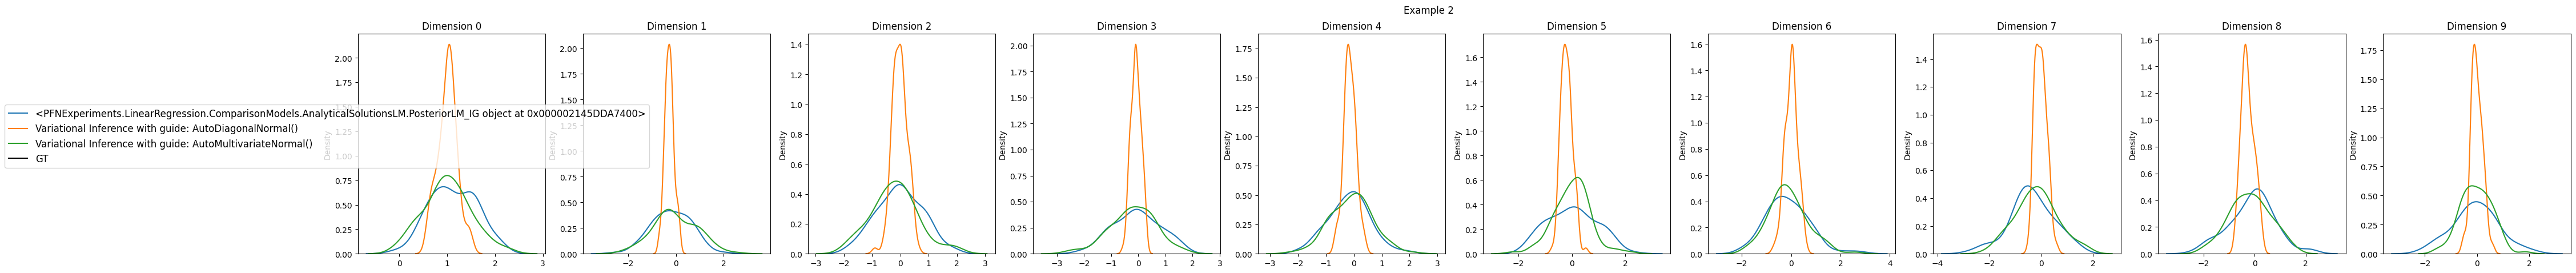

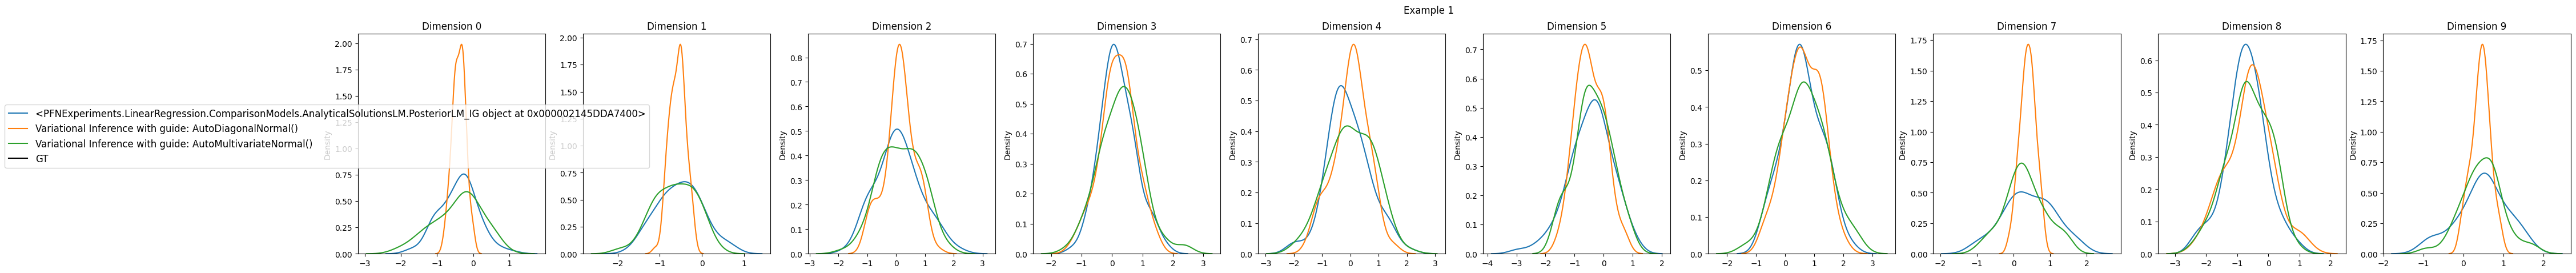

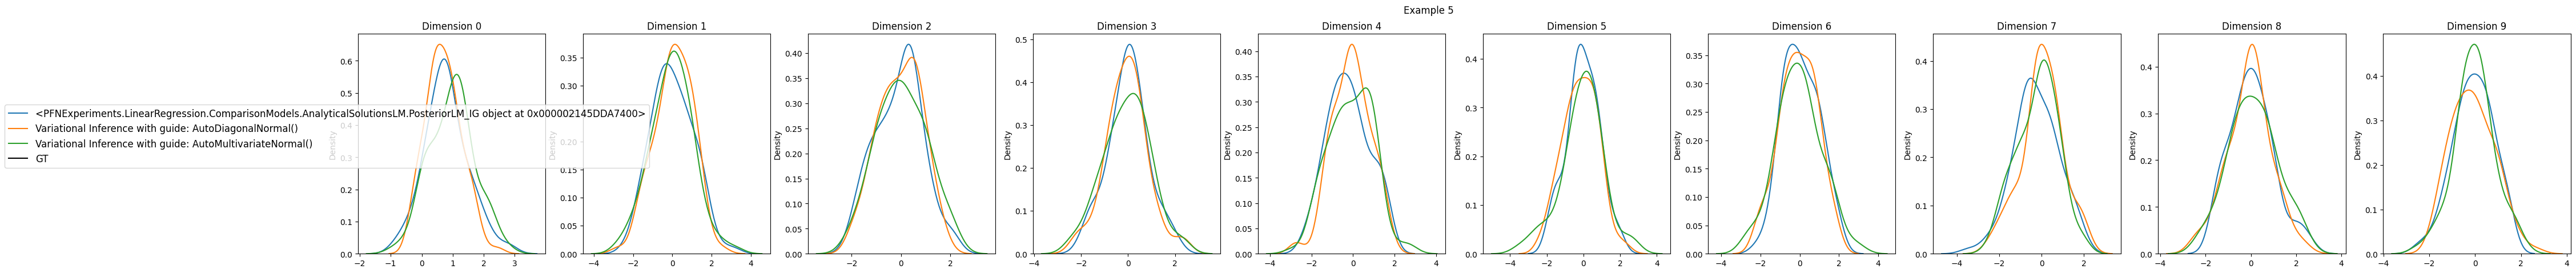

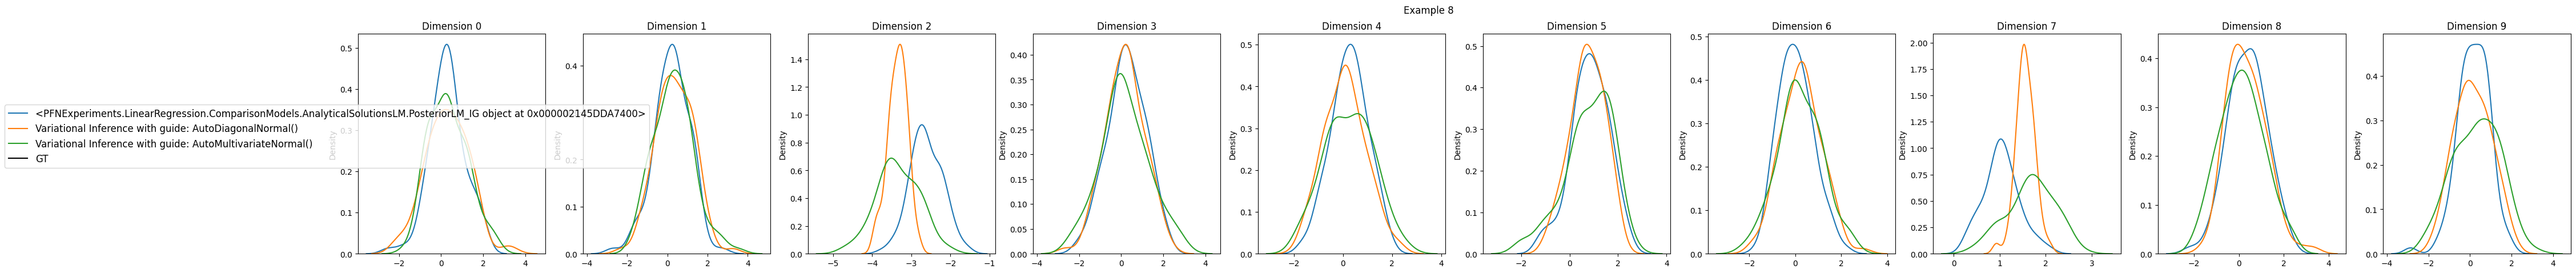

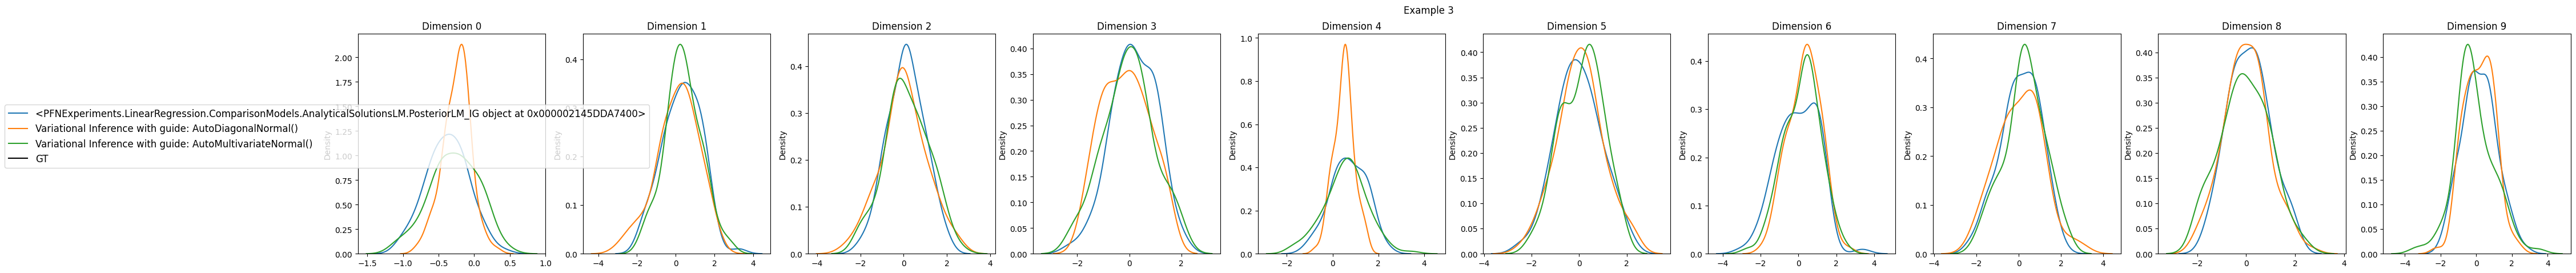

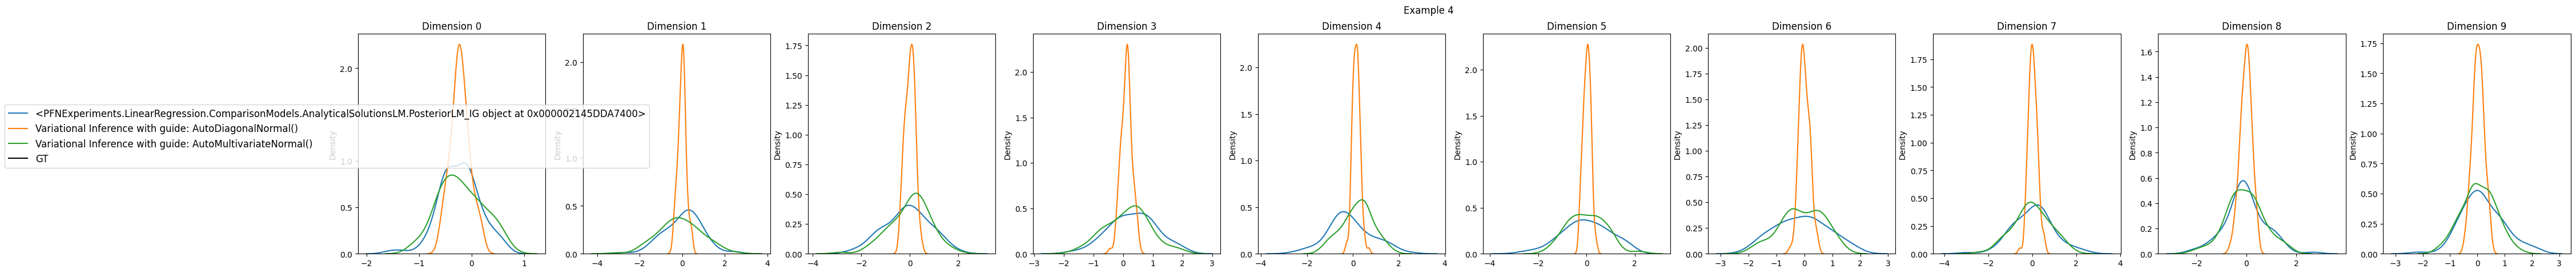

In [ ]:
eval.plot_results(max_number_plots=20)